In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import time
import pandas as pd
import pickle
repoDir= os.getcwd()
os.chdir(os.path.join(repoDir , '..' ))
repoDir= os.getcwd()

In [2]:
savedData= {}
filenames= ['extraneous/2017-04-06_chipPerVisitData_newAfterburnerOutput_fID1447_RandomDitherFieldPerVisit_randomRotDithered_nonDiscRegion_nside512_187761TotChipsToSimulate.pickle']
for filename in filenames:
    key= 'Random_Both_nside512_new'
    with open('chipsPerVisitData/'+filename, 'rb') as handle:
        savedData[key]= pickle.load(handle)
        
filenames= ['previous used - bugged/2017-01-29_chipPerVisitData_newAfterburnerOutput_fID1447_RandomDitherFieldPerVisit_randomRotDithered_nonDiscRegion_131052TotChipsToSimulate.pickle']
for filename in filenames:
    key= 'Random_Both_nside512_old'
    with open('chipsPerVisitData/'+filename, 'rb') as handle:
        savedData[key]= pickle.load(handle)
        
        
filenames= ['2017-04-06_chipPerVisitData_newAfterburnerOutput_fID1447_RandomDitherFieldPerVisit_randomRotDithered_nonDiscRegion_nside1024_192103NonWFChipsToSimulate.pickle']
for filename in filenames:
    key= 'Random_Both_nside1024_new'
    with open('chipsPerVisitData/'+filename, 'rb') as handle:
        savedData[key]= pickle.load(handle)

All detectors include:
- 8 non-science sensors: 'R:0,0 S:1,2', 'R:0,0 S:2,1', 'R:0,4 S:1,0', 'R:0,4 S:2,1', 'R:4,0 S:0,1', 'R:4,0 S:1,2', 'R:4,4 S:0,1', 'R:4,4 S:1,0'
- 16 wavefront sensors: 'R:4,0 S:0,2,A', 'R:4,0 S:0,2,B','R:0,4 S:2,0,A', 'R:0,4 S:2,0,B', 'R:0,0 S:2,2,A', 'R:0,0 S:2,2,B', 'R:4,4 S:0,0,A', 'R:4,4 S:0,0,B'
           
           
^ which we are not simulating.

In [3]:
from lsst.obs.lsstSim import LsstSimMapper
from lsst.afw.cameraGeom import SCIENCE

camera = LsstSimMapper().camera
science_detectors = []
for det in camera:
    if det.getType() == SCIENCE:
        science_detectors.append(det.getName())   # does not contain 8 non-science detectors

In [4]:
wavefront= ['R:4,0 S:0,2,A', 'R:4,0 S:0,2,B','R:0,4 S:2,0,A', 'R:0,4 S:2,0,B',
           'R:0,0 S:2,2,A', 'R:0,0 S:2,2,B','R:4,4 S:0,0,A', 'R:4,4 S:0,0,B']

Random_Both_nside1024_new
** All chips (including wavefront and non-science) **
-- Max number of chips added by any given visit: 191
-- Min number of chips added by any given visit: 1
-- Total number of chips (across all visits to be simulated): 192103

** Non-wavefront chips only **
-- Max number of chips added by any given visit: 191
-- Min number of chips added by any given visit: 1
-- Total number of chips (across all visits to be simulated): 192103

** Non-wavefront and science chips only **
-- Max number of chips added by any given visit: 183
-- Min number of chips added by any given visit: 0
-- Total number of chips (across all visits to be simulated): 184658



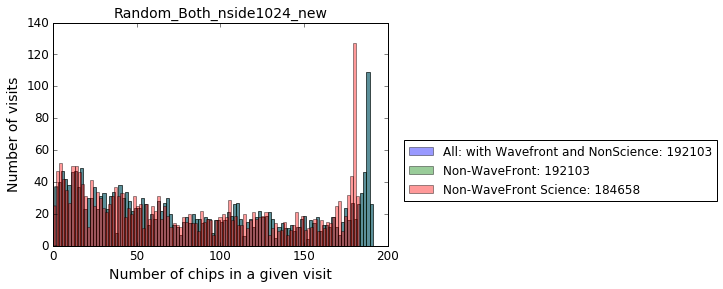

Random_Both_nside512_new
** All chips (including wavefront and non-science) **
-- Max number of chips added by any given visit: 188
-- Min number of chips added by any given visit: 1
-- Total number of chips (across all visits to be simulated): 187761

** Non-wavefront chips only **
-- Max number of chips added by any given visit: 188
-- Min number of chips added by any given visit: 1
-- Total number of chips (across all visits to be simulated): 187761

** Non-wavefront and science chips only **
-- Max number of chips added by any given visit: 182
-- Min number of chips added by any given visit: 0
-- Total number of chips (across all visits to be simulated): 184626



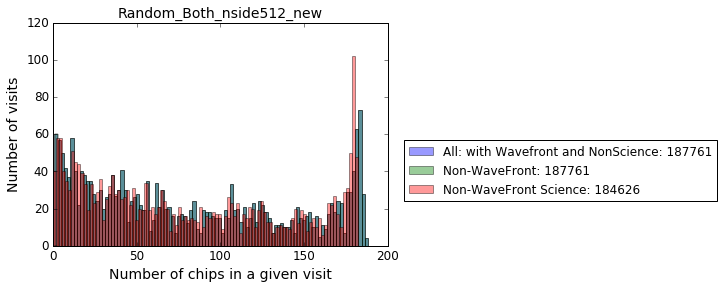

Random_Both_nside512_old
** All chips (including wavefront and non-science) **
-- Max number of chips added by any given visit: 191
-- Min number of chips added by any given visit: 1
-- Total number of chips (across all visits to be simulated): 131052

** Non-wavefront chips only **
-- Max number of chips added by any given visit: 184
-- Min number of chips added by any given visit: 1
-- Total number of chips (across all visits to be simulated): 127400

** Non-wavefront and science chips only **
-- Max number of chips added by any given visit: 180
-- Min number of chips added by any given visit: 0
-- Total number of chips (across all visits to be simulated): 123975



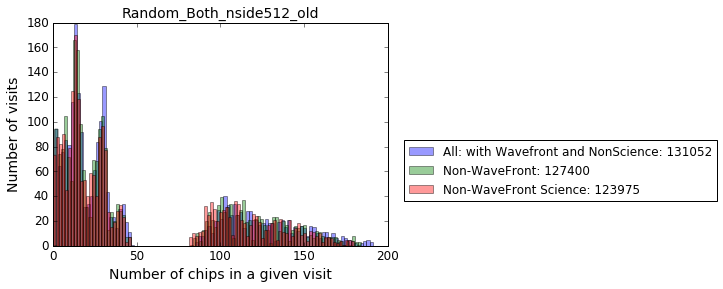

In [5]:
for key in savedData:
    numChipsAll= []
    numChipsNonWF= []
    numChipToSim= []
    print key
    for i in range(len(savedData[key]['obsHistID'])):
        
        temp= savedData[key]['chipNames'][i]
        numChipsAll.append(len(temp))
        temp= list(set(temp)-set(wavefront))
        numChipsNonWF.append(len(temp))
        
        phantom= list(set(temp)-set(science_detectors))
        good= list(set(temp)-set(phantom))
        numChipToSim.append(len(good))
        
    print '** All chips (including wavefront and non-science) **'
    print '-- Max number of chips added by any given visit: %d'%(max(numChipsAll))
    print '-- Min number of chips added by any given visit: %d'%(min(numChipsAll))
    print '-- Total number of chips (across all visits to be simulated): %d\n'%(sum(numChipsAll))   
    
    print '** Non-wavefront chips only **'
    print '-- Max number of chips added by any given visit: %d'%(max(numChipsNonWF))
    print '-- Min number of chips added by any given visit: %d'%(min(numChipsNonWF))
    print '-- Total number of chips (across all visits to be simulated): %d\n'%(sum(numChipsNonWF))
    
    print '** Non-wavefront and science chips only **'
    print '-- Max number of chips added by any given visit: %d'%(max(numChipToSim))
    print '-- Min number of chips added by any given visit: %d'%(min(numChipToSim))
    print '-- Total number of chips (across all visits to be simulated): %d\n'%(sum(numChipToSim))
 
    bins= 100
    alpha= 0.4
    fontsize= 14
    plt.hist(numChipsAll, label= 'All: with Wavefront and NonScience: %s'%(sum(numChipsAll)), 
             alpha= alpha, bins= bins)
    plt.hist(numChipsNonWF, label= 'Non-WaveFront: %s'%(sum(numChipsNonWF)), 
             alpha= alpha, bins= bins)
    plt.hist(numChipToSim, label= 'Non-WaveFront Science: %s'%(sum(numChipToSim)), 
             alpha= alpha, bins= bins)
    
    
    plt.title(key, fontsize= fontsize)
    plt.legend(bbox_to_anchor=(2.,.5))
    plt.xlabel('Number of chips in a given visit', fontsize= fontsize)
    plt.ylabel('Number of visits', fontsize= fontsize)
    #plt.legend(loc= 1)#bbox_to_anchor= (1.5,0.5))
    plt.tick_params(axis='x', labelsize=fontsize-2)
    plt.tick_params(axis='y', labelsize=fontsize-2)
    plt.show()

#### We dont see a bimodal distrbution (as in the last panel; based on the older/bugged code) in the new data (first two panels).